In [1]:
import shutil
from pathlib import Path
import os
import pandas as pd

C:\Users\sshri\AppData\Local\Temp\ipykernel_13960\197364822.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
!Nvidia-SMI

Tue Jan 30 20:23:04 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   52C    P8              3W /   65W |      71MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
data = pd.read_csv('../Test_Data/summan.smr')

In [4]:
data.head()

,img_name,lat,lon,heading,pitch,timestamp,status,Tree,Pole w/ wire,Intersection
0,_panoid_-1tN4lEA-abrRGZw66d34Q_heading_294_pit...,-23.549251,-46.541349,294,-1,2019-03,free,1,1,0
1,_panoid_-2bCdOFUdXRl3YZkXZ2KVw_heading_224_pit...,-23.524786,-46.695520,224,4,2019-04,free,1,1,1
2,_panoid_-2bCdOFUdXRl3YZkXZ2KVw_heading_334_pit...,-23.524786,-46.695520,334,4,2019-04,free,1,1,1
3,_panoid_-2yEbA_Nn547hSIMJqXFmg_heading_133_pit...,-23.564307,-46.755973,133,6,2019-05,free,1,0,0
4,_panoid_-2yEbA_Nn547hSIMJqXFmg_heading_248_pit...,-23.564307,-46.755973,248,6,2019-05,free,1,0,0


In [5]:
data = data.drop('lat',axis=1)
data = data.drop('lon',axis=1)
data = data.drop('timestamp',axis=1)
data = data.drop('status',axis=1)
data.head()

,img_name,heading,pitch,Tree,Pole w/ wire,Intersection
0,_panoid_-1tN4lEA-abrRGZw66d34Q_heading_294_pit...,294,-1,1,1,0
1,_panoid_-2bCdOFUdXRl3YZkXZ2KVw_heading_224_pit...,224,4,1,1,1
2,_panoid_-2bCdOFUdXRl3YZkXZ2KVw_heading_334_pit...,334,4,1,1,1
3,_panoid_-2yEbA_Nn547hSIMJqXFmg_heading_133_pit...,133,6,1,0,0
4,_panoid_-2yEbA_Nn547hSIMJqXFmg_heading_248_pit...,248,6,1,0,0


In [6]:
from PIL import Image
import os

In [7]:
dataset_path = '../Test_Data/'

# Create a list to store file paths and corresponding labels
file_paths = []
labels = []

In [8]:
data['img_name'] = dataset_path + data['img_name']
data.head()

,img_name,heading,pitch,Tree,Pole w/ wire,Intersection
0,../Test_Data/_panoid_-1tN4lEA-abrRGZw66d34Q_he...,294,-1,1,1,0
1,../Test_Data/_panoid_-2bCdOFUdXRl3YZkXZ2KVw_he...,224,4,1,1,1
2,../Test_Data/_panoid_-2bCdOFUdXRl3YZkXZ2KVw_he...,334,4,1,1,1
3,../Test_Data/_panoid_-2yEbA_Nn547hSIMJqXFmg_he...,133,6,1,0,0
4,../Test_Data/_panoid_-2yEbA_Nn547hSIMJqXFmg_he...,248,6,1,0,0


In [9]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
train_df.head()

,img_name,heading,pitch,Tree,Pole w/ wire,Intersection
535,../Test_Data/_panoid_-qW3U3yMEE8vz47tLnu1eg_he...,74,0,1,1,1
696,../Test_Data/_panoid_2HlR4Kl9I4I7ZiwABtpsLg_he...,20,0,1,1,0
557,../Test_Data/_panoid_00Y2OYhvDszADp7kTpQPSw_he...,62,-1,1,1,0
643,../Test_Data/_panoid_1oqQcQwNkHIpC62HBv2B3A_he...,200,0,1,1,1
597,../Test_Data/_panoid_0Ral0UQRhTFsLf2RDhJ1RQ_he...,180,-1,1,1,0


In [11]:
test_df.head()

,img_name,heading,pitch,Tree,Pole w/ wire,Intersection
521,../Test_Data/_panoid_-iajR7i019p5y3804BFsHQ_he...,16,0,1,1,1
941,../Test_Data/_panoid_663_1Lm2ffFgQ8Mc-LkkYQ_he...,276,3,1,1,1
741,../Test_Data/_panoid_35pYIATDnbbUSXxv3S5cqg_he...,220,-2,1,1,1
980,../Test_Data/_panoid_6mzXYi24lkzV8qCqUrjNeQ_he...,286,0,1,1,0
411,../Test_Data/_panoid_1eMMB01aA_uyCOWecNMRiw_he...,338,-1,1,1,1


In [43]:
train_df.shape,test_df.shape
test_df.drop(test_df.tail(30).index,inplace=True)

In [13]:
import tensorflow as tf

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_df['img_name'].values, train_df['Intersection'].values)
)
print(train_dataset)

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [44]:
test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_df['img_name'].values, test_df['Intersection'].values)
)
print(test_dataset)

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [16]:
x = 0
for img_name, intersection in train_dataset: 
    x += 1
    print("Image Name:", img_name.numpy())
    print("Intersection Value:", intersection)
    print("---")
x

Image Name: b'../Test_Data/_panoid_-qW3U3yMEE8vz47tLnu1eg_heading_74_pitch_0.png'
Intersection Value: tf.Tensor(1, shape=(), dtype=int64)
---
Image Name: b'../Test_Data/_panoid_2HlR4Kl9I4I7ZiwABtpsLg_heading_20_pitch_0.png'
Intersection Value: tf.Tensor(0, shape=(), dtype=int64)
---
Image Name: b'../Test_Data/_panoid_00Y2OYhvDszADp7kTpQPSw_heading_62_pitch_-1.png'
Intersection Value: tf.Tensor(0, shape=(), dtype=int64)
---
Image Name: b'../Test_Data/_panoid_1oqQcQwNkHIpC62HBv2B3A_heading_200_pitch_0.png'
Intersection Value: tf.Tensor(1, shape=(), dtype=int64)
---
Image Name: b'../Test_Data/_panoid_0Ral0UQRhTFsLf2RDhJ1RQ_heading_180_pitch_-1.png'
Intersection Value: tf.Tensor(0, shape=(), dtype=int64)
---
Image Name: b'../Test_Data/_panoid_-wsxQ006BBJ05m5fAW4LBA_heading_89_pitch_0.png'
Intersection Value: tf.Tensor(1, shape=(), dtype=int64)
---
Image Name: b'../Test_Data/_panoid_5odBlti1I0KY6RZfBNgAMw_heading_229_pitch_8.png'
Intersection Value: tf.Tensor(0, shape=(), dtype=int64)
---
I

800

In [17]:
def load_and_preprocess_image(file_path, label):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_image(image, channels=3)  # Adjust channels based on your images

    # Explicitly set the shape of the image tensor
    image.set_shape([640, 640, 3])  # Assuming 3 channels for RGB images

    # Resize the image
    image = tf.image.resize(image, (640, 640))  # Adjust size as needed

    image = image / 255.0  # Normalize pixel values to the range [0, 1]
    return image, label

In [45]:
train_dataset = train_dataset.map(load_and_preprocess_image)

TypeError: in user code:

    File "C:\Users\sshri\AppData\Local\Temp\ipykernel_13960\2488349845.py", line 2, in load_and_preprocess_image  *
        image = tf.io.read_file(file_path)

    TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.


In [46]:
test_dataset = test_dataset.map(load_and_preprocess_image)

In [20]:
!Nvidia-SMI

Tue Jan 30 20:23:47 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8              3W /   65W |    3770MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
train_dataset = train_dataset.shuffle(buffer_size=len(train_df))
train_dataset = train_dataset.batch(32)

In [47]:
test_dataset = test_dataset.shuffle(buffer_size=len(train_df))
test_dataset = test_dataset.batch(32)

In [23]:
x = 0
y = None
for img, intersection in train_dataset:  # Adjust the number as needed
    print("Image Name:", img_name.numpy())
    print('image is ',img.numpy())
    print("Intersection Value:", intersection.numpy())
    print("---")
    y = img

Image Name: b'../Test_Data/_panoid_-ofjwRvu_CtaQiBRxLgxDQ_heading_211_pitch_-3.png'
image is  [[[[0.67058825 0.7764706  0.89411765]
   [0.67058825 0.7764706  0.89411765]
   [0.67058825 0.7764706  0.89411765]
   ...
   [0.57254905 0.6313726  0.7058824 ]
   [0.57254905 0.6313726  0.7058824 ]
   [0.54901963 0.60784316 0.68235296]]

  [[0.67058825 0.7764706  0.89411765]
   [0.67058825 0.7764706  0.89411765]
   [0.67058825 0.7764706  0.89411765]
   ...
   [0.5372549  0.59607846 0.67058825]
   [0.5529412  0.6117647  0.6862745 ]
   [0.5921569  0.6509804  0.7254902 ]]

  [[0.67058825 0.7764706  0.89411765]
   [0.67058825 0.7764706  0.89411765]
   [0.67058825 0.7764706  0.89411765]
   ...
   [0.5882353  0.64705884 0.72156864]
   [0.57254905 0.6313726  0.7058824 ]
   [0.5294118  0.5882353  0.6627451 ]]

  ...

  [[0.48235294 0.4862745  0.45490196]
   [0.47058824 0.4745098  0.44313726]
   [0.4627451  0.46666667 0.43529412]
   ...
   [0.19607843 0.19607843 0.19607843]
   [0.14509805 0.14509805 0.1

In [24]:
y.shape

TensorShape([32, 640, 640, 3])

In [25]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(640,640,3),
                                                           include_top=False,
                                                           weights='imagenet')
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 640, 640, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 320, 320, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 320, 320, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [26]:
from tensorflow.keras import layers,models
model = models.Sequential([
            base_model,
            layers.GlobalAveragePooling2D(),
            layers.Dense(1000, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(500, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(1, activation='sigmoid')  # Assuming binary classification
        ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 20, 20, 1280)     2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              1281000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0

In [27]:
model.compile(optimizer='adam',
                      loss='binary_crossentropy',  # Adjust the loss function based on your task
                      metrics=['accuracy'])

In [28]:
epochs = 100  # Adjust the number of epochs as needed
base_model.trainable = False
history = model.fit(
    train_dataset,
    epochs=epochs,
    
)
history

Epoch 1/100
25/25 [==============================] - 16s 449ms/step - loss: 0.7794 - accuracy: 0.5487
Epoch 2/100
25/25 [==============================] - 12s 446ms/step - loss: 0.7426 - accuracy: 0.5650
Epoch 3/100
25/25 [==============================] - 12s 449ms/step - loss: 0.6773 - accuracy: 0.6250
Epoch 4/100
25/25 [==============================] - 12s 450ms/step - loss: 0.6573 - accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 12s 450ms/step - loss: 0.6096 - accuracy: 0.6712
Epoch 6/100
25/25 [==============================] - 12s 446ms/step - loss: 0.5665 - accuracy: 0.7188
Epoch 7/100
25/25 [==============================] - 12s 447ms/step - loss: 0.5984 - accuracy: 0.6612
Epoch 8/100
25/25 [==============================] - 12s 446ms/step - loss: 0.5441 - accuracy: 0.7200
Epoch 9/100
25/25 [==============================] - 12s 446ms/step - loss: 0.5425 - accuracy: 0.7400
Epoch 10/100
25/25 [==============================] - 12s 447ms/step - loss: 0.525

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 20, 20, 1280)     2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              1281000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0

In [30]:
base_model.trainable = True
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 20, 20, 1280)     2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              1281000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0

In [31]:
epochs = 20  # Adjust the number of epochs as needed
history = model.fit(
    train_dataset,
    epochs=epochs
)
history

Epoch 1/20
25/25 [==============================] - 14s 508ms/step - loss: 0.3887 - accuracy: 0.8313
Epoch 2/20
25/25 [==============================] - 13s 485ms/step - loss: 0.3742 - accuracy: 0.8388
Epoch 3/20
25/25 [==============================] - 13s 487ms/step - loss: 0.4116 - accuracy: 0.8188
Epoch 4/20
25/25 [==============================] - 13s 488ms/step - loss: 0.3787 - accuracy: 0.8475
Epoch 5/20
25/25 [==============================] - 13s 487ms/step - loss: 0.3764 - accuracy: 0.8425
Epoch 6/20
25/25 [==============================] - 13s 490ms/step - loss: 0.3259 - accuracy: 0.8775
Epoch 7/20
25/25 [==============================] - 13s 488ms/step - loss: 0.3237 - accuracy: 0.8775
Epoch 8/20
25/25 [==============================] - 14s 500ms/step - loss: 0.3243 - accuracy: 0.8712
Epoch 9/20
25/25 [==============================] - 13s 488ms/step - loss: 0.3443 - accuracy: 0.8550
Epoch 10/20
25/25 [==============================] - 13s 494ms/step - loss: 0.3390 - accura

In [37]:
epochs = 10  # Adjust the number of epochs as needed
base_model.trainable = False
history = model.fit(
    train_dataset,
    epochs=epochs,
    
)
history

Epoch 1/10
25/25 [==============================] - 15s 523ms/step - loss: 0.3902 - accuracy: 0.8375
Epoch 2/10
25/25 [==============================] - 14s 505ms/step - loss: 0.3356 - accuracy: 0.8700
Epoch 3/10
25/25 [==============================] - 14s 512ms/step - loss: 0.3123 - accuracy: 0.8850
Epoch 4/10
25/25 [==============================] - 14s 508ms/step - loss: 0.2963 - accuracy: 0.8925
Epoch 5/10
25/25 [==============================] - 14s 510ms/step - loss: 0.3224 - accuracy: 0.8763
Epoch 6/10
25/25 [==============================] - 14s 522ms/step - loss: 0.3662 - accuracy: 0.8487
Epoch 7/10
25/25 [==============================] - 15s 515ms/step - loss: 0.3103 - accuracy: 0.8838
Epoch 8/10
25/25 [==============================] - 14s 510ms/step - loss: 0.2975 - accuracy: 0.8913
Epoch 9/10
25/25 [==============================] - 15s 525ms/step - loss: 0.3485 - accuracy: 0.8612
Epoch 10/10
25/25 [==============================] - 15s 528ms/step - loss: 0.3332 - accura

In [38]:
model.evaluate(train_dataset)


25/25 [==============================] - 15s 549ms/step - loss: 0.1483 - accuracy: 0.9812


[0.14826075732707977, 0.981249988079071]

In [48]:
model.evaluate(test_dataset)

6/6 [==============================] - 4s 507ms/step - loss: 1.4137 - accuracy: 0.7310


[1.4136971235275269, 0.7309941649436951]

25/25 [==============================] - 15s 542ms/step


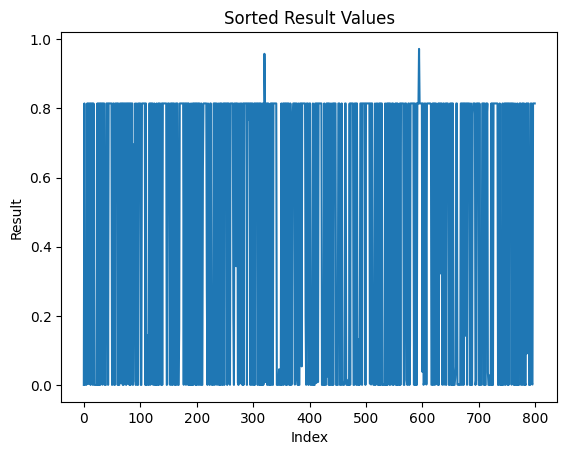

In [50]:
result = model.predict(train_dataset)


import matplotlib.pyplot as plt

plt.plot(range(len(result)), result)
plt.xlabel('Index')
plt.ylabel('Result')
plt.title('Sorted Result Values')
plt.show()

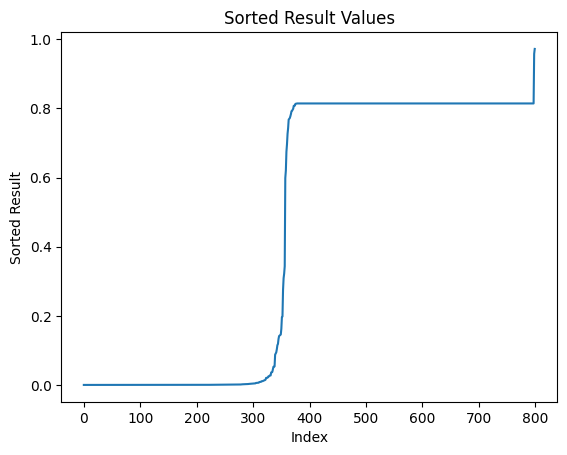

In [51]:
import numpy as np
result_sorted = np.sort(result, axis=0)

# Flatten the sorted result to get a 1D array
result_sorted = result_sorted.flatten()

# Plot the sorted result
plt.plot(range(len(result_sorted)), result_sorted)
plt.xlabel('Index')
plt.ylabel('Sorted Result')
plt.title('Sorted Result Values')
plt.show()

In [52]:
sum(test_df['Intersection'] == 1),sum(result<= 0.5)

(88, array([357]))

In [53]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
sc = 0.8

a = accuracy_score(y_true=train_df['Intersection'],y_pred=result> sc)
b = precision_score(y_true=train_df['Intersection'],y_pred=result> sc)
c = recall_score(y_true=train_df['Intersection'],y_pred=result> sc)
d = confusion_matrix(y_true=train_df['Intersection'],y_pred=result> sc)
a,b,c,d

(0.48,
 0.514018691588785,
 0.514018691588785,
 array([[164, 208],
        [208, 220]], dtype=int64))

In [192]:
model.save('res50sigmoid')

INFO:tensorflow:Assets written to: res50sigmoid\assets


INFO:tensorflow:Assets written to: res50sigmoid\assets


In [46]:
sc

0.5

In [193]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np 
import matplotlib.pyplot as plt

In [194]:
img_path = '../Test_Data/_panoid_--2PQ1U5-r20HZJQySYogw_heading_324_pitch_2.png'
img = image.load_img(img_path, target_size=(640, 640))  # Adjust target size based on your model input shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
img_array.shape
import cv2

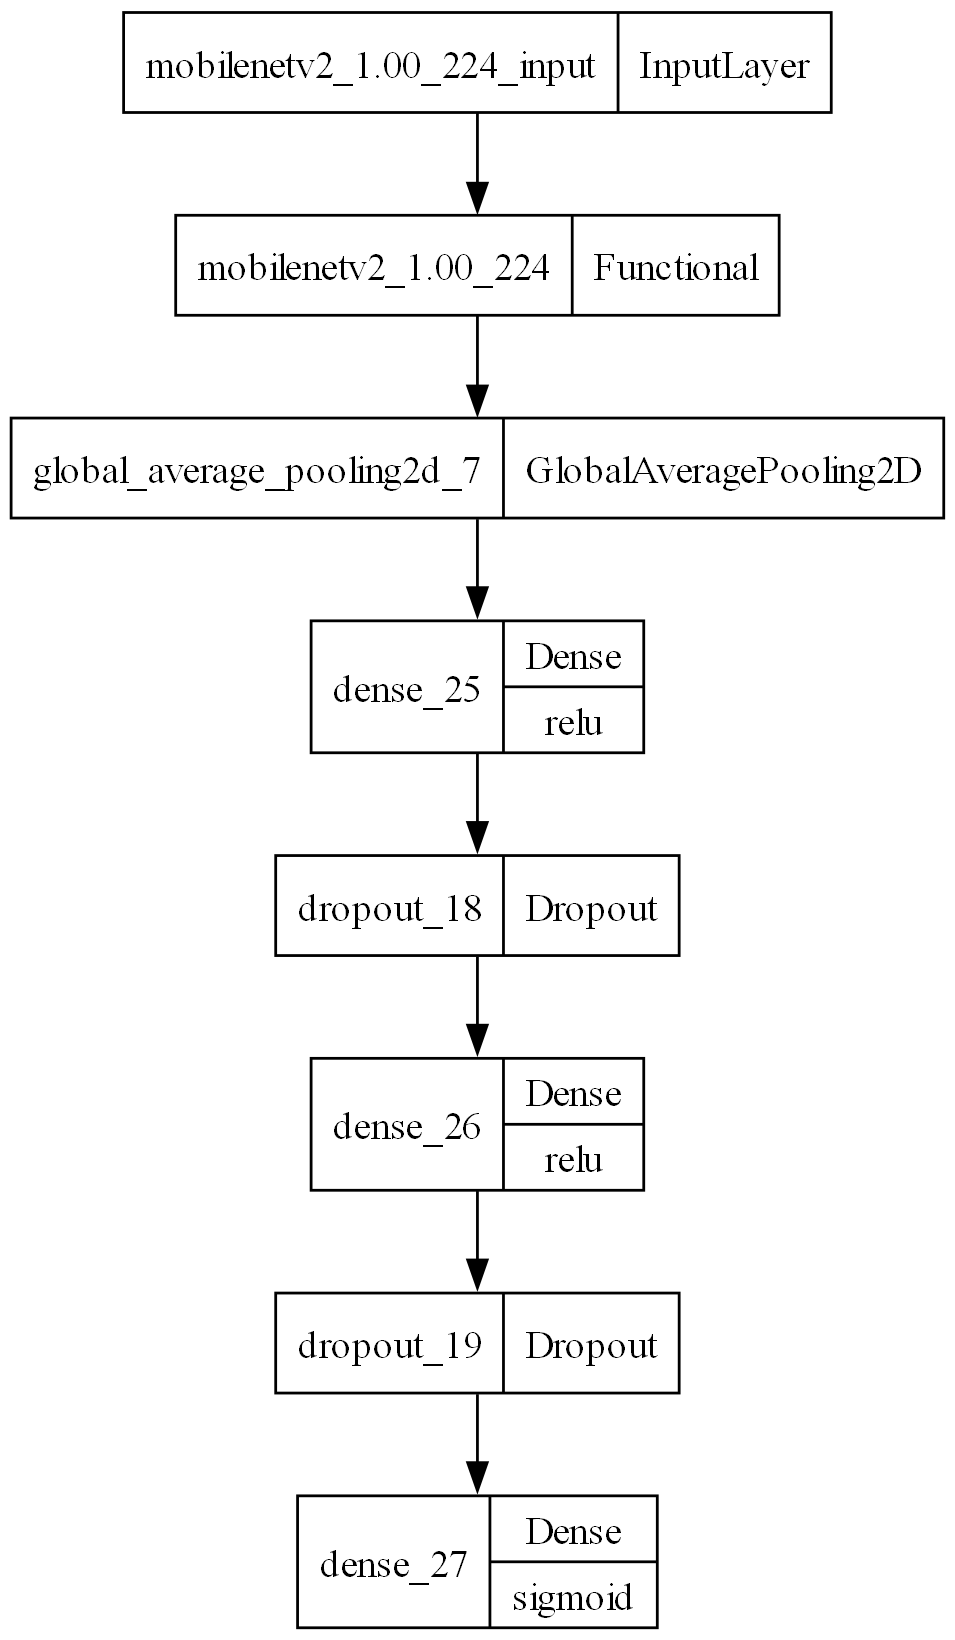

In [195]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=200,
    show_layer_activations=True)

In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3
import matplotlib.pyplot as plt

In [64]:
img_path = '../Test_Data/_panoid_0eqxUlVwvs2uRs5ZJPqx0g_heading_352_pitch_-1.png'  # Replace with your image path
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(640, 640))
x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.expand_dims(x, axis=0)
x = tf.keras.applications.inception_v3.preprocess_input(x)
x.shape

TensorShape([1, 640, 640, 3])

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 20, 20, 1280)     2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              1281000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0

In [67]:
model.predict(x)
model.save(filepath='MyfinalPart')

1/1 [==============================] - 0s 24ms/step


INFO:tensorflow:Assets written to: MyfinalPart\assets


INFO:tensorflow:Assets written to: MyfinalPart\assets


In [57]:
import tensorflow as tf
import matplotlib.pyplot as plt

last_conv_layer = model.get_layer('mobilenetv2_1.00_224')  # Replace with the correct layer name

In [58]:
def gradcam(model, img, layer_name):
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

    with tf.GradientTape() as tape:
        intermediate_layer_output = intermediate_layer_model(img)
        preds = model(img)
        class_probs = tf.nn.softmax(preds[0])
        class_idx = tf.argmax(class_probs)
        class_channel = preds[:, class_idx]

    intermediate_layer_output_np = tf.keras.backend.function([model.input], [intermediate_layer_output])([img])[0]
    class_channel_np = tf.keras.backend.function([model.input], [class_channel])([img])[0]

    grads = tape.gradient(intermediate_layer_output_np, class_channel_np)
    cam = tf.reduce_mean(grads, axis=(0, 1, 2))
    cam = tf.expand_dims(cam, axis=0)
    cam = tf.expand_dims(cam, axis=-1)
    heatmap = tf.nn.relu(tf.image.resize(cam, (640, 640)))
    return heatmap

In [59]:
x.shape

TensorShape([1, 640, 640, 3])

In [ ]:
for img,img_name in train_dataset:
    x = model.predict(img)
    p = 0
    for i in x:
        p += 1
        if i > 0.5:
            plt.imshow(img[p-1])
            plt.title('RGB Image')
            plt.show()

In [60]:
heatmap = gradcam(model, x, 'dense_5')

# Normalize and display the heatmap
heatmap = tf.squeeze(heatmap)
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
heatmap = heatmap.numpy()

NameError: name 'Model' is not defined

NameError: name 'heatmap' is not defined

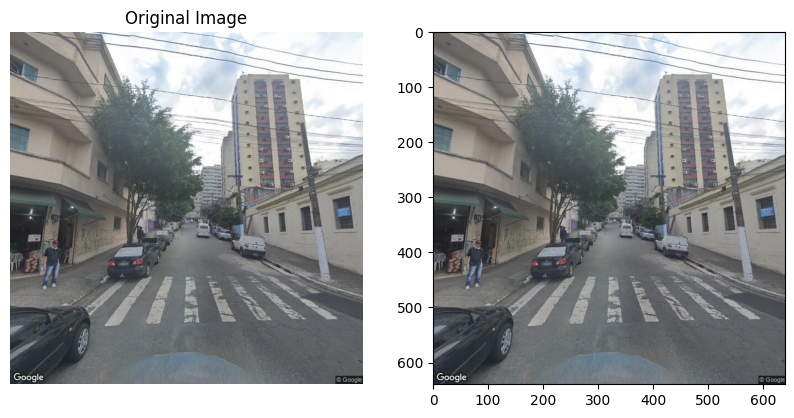

In [61]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap
plt.axis('off')
plt.title('Grad-CAM Heatmap')
plt.show()

In [144]:
os.environ["KERAS_BACKEND"] = "tensorflow"
from tensorflow import keras
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt

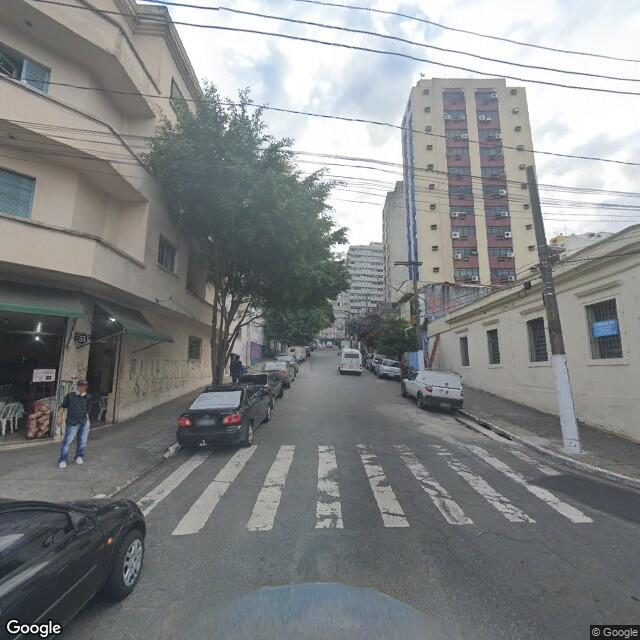

In [145]:
from PIL import Image
model_builder = keras.applications.xception.Xception
img_size = (640, 640)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

img_path = "../Test_Data/_panoid_-9idKqWBtEhrdwoMXEg1bQ_heading_276_pitch_5.png"

# Load the image using PIL (Python Imaging Library)
img = Image.open(img_path)
img

In [146]:
def get_img_array(img_path,size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array
get_img_array(img_path,(640,640,3)).shape

(1, 640, 640, 3)

In [147]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [148]:
img_array = preprocess_input(get_img_array(img_path,(640,640,3)))

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

ValueError: in user code:

    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "xception" is incompatible with the layer: expected shape=(None, 299, 299, 3), found shape=(None, 640, 640, 3)
